Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey


In [2]:
from __future__ import print_function, division

### Exercise 5.1

<tt>scipy.stats</tt> contains objects that represent analytic distributions

In [3]:
import scipy.stats

%matplotlib inline

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [4]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [5]:
dist.mean(), dist.std()

(178.0, 7.7000000000000002)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [6]:
dist.cdf(mu-sigma)

0.15865525393145741

How many people are between 5'10" and 6'1"?

In [7]:
low = dist.cdf(177.8)    # 5'10" -> in x 2.54 = cm
high = dist.cdf(185.4)   # 6'1"  -> 185.4 cm
low, high, high-low

(0.48963902786483265, 0.83173371081078573, 0.34209468294595308)

### Exercise 5.2

<tt>scipy.stats.pareto</tt> represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [8]:
alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [9]:
dist.mean()

2.4285714285714288

What fraction of people are shorter than the mean?

In [10]:
dist.cdf(dist.mean())

0.77873969756528805

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [11]:
(1 - dist.cdf(1000)) * 7e9
dist.sf(1000) * 7e9

55602.976430479954

How tall do we expect the tallest person to be?

In [12]:
dist.sf(600000) * 7e9            # find the height that yields about 1 person

1.0525452731613427

### Exercise 5.3

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

In [13]:
import random
import thinkstats2
import thinkplot

`thinkplot.Cdf` provides a transform that makes the CDF of a Weibull distribution look like a straight line.

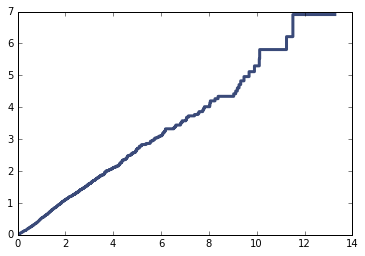

In [14]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Show(legend=False)

Make a random selection from <tt>cdf</tt>.

In [15]:
cdf.Random()

0.035933780658425035

Draw a random sample from <tt>cdf</tt>.

In [16]:
cdf.Sample(10)

array([ 1.32018606,  1.92266436,  5.63083128,  0.23631128,  0.52716977,
        0.88816052,  0.91634414,  3.60158885,  2.07552188,  1.15087629])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

{'xscale': 'linear', 'yscale': 'linear'}

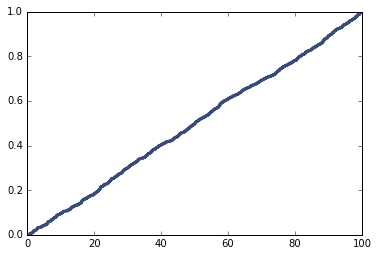

In [17]:
prs = [cdf.PercentileRank(x) for x in cdf.Sample(1000)]
pr_cdf = thinkstats2.Cdf(prs)
thinkplot.Cdf(pr_cdf)

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

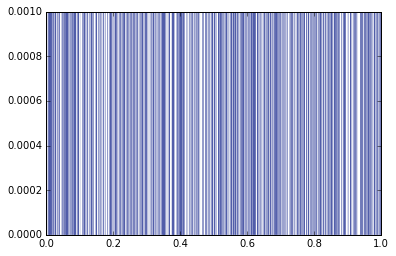

In [18]:
values = [random.random() for _ in range(1000)]
pmf = thinkstats2.Pmf(values)
thinkplot.Pmf(pmf, linewidth=0.1)

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

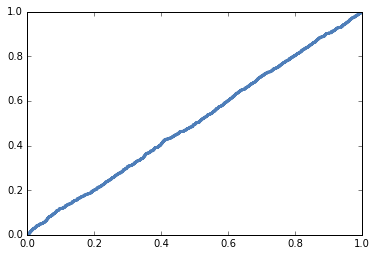

In [19]:
cdf = thinkstats2.Cdf(values)
thinkplot.Cdf(cdf)
thinkplot.Show()

### Exercise 5.4

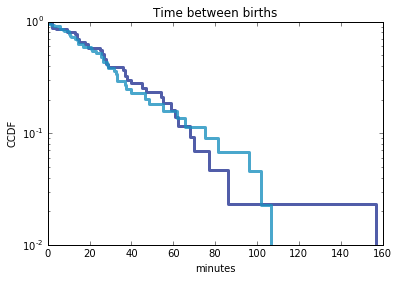

NameError: name 'np' is not defined

In [20]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

n = len(diffs)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]
model = thinkstats2.Cdf(sample, label='model')
    
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, model], complement=True)
thinkplot.Show(title='Time between births',
                xlabel='minutes',
                ylabel='CCDF',
                yscale='log')

lam, np.mean(sample)

### Exercise 5.5

Here is the code from mystery.py that generates the random data files:

In [ ]:
from mystery import *

funcs = [uniform_sample, triangular_sample, expo_sample,
             gauss_sample, lognorm_sample, pareto_sample,
             weibull_sample, gumbel_sample]

for i in range(len(funcs)):
    sample = funcs[i](1000)
    filename = 'mystery%d.dat' % i
    print(filename, funcs[i].__name__)